In [30]:
import pandas as pd
import mysql.connector as sql
import geopandas as gpd
from shapely.geometry import Point
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('Data/house_data_details_cleaned.csv')
points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1) #Changing long and lat into shape
gdf = gpd.GeoDataFrame(df, geometry=points)
gdf.crs = {'init': 'epsg:4326'}
gdf.head()

,longitude,latitude,address,property_type,home_size,lot_size,year_built,parcel_number,realtyID,county,...,estimated_value,sex_offenders,crime_index,enviornmental_hazards,natural_disasters,school quality,url,bedrooms,bathrooms,geometry
0,-118.133679,33.974622,6224 Nye St,Condominium,1357.0,22215.6,1988.0,6357012043,1.111054e+09,Los Angeles,...,439000.0,7,High,15,1,Average,https://www.realtytrac.com/property/ca/commerc...,3.0,3.0,POINT (-118.13368 33.97462)
1,-118.396891,34.156562,4723 Laurel Canyon Blvd,Restaurant,2250.0,9799.0,1959.0,2356037034,1.111055e+09,Los Angeles,...,NaN,5,NaN,6,1,Excellent,https://www.realtytrac.com/property/ca/valley-...,NaN,NaN,POINT (-118.39689 34.15656)
2,-118.451165,34.677777,18118 Elizabeth Lake Rd,Apartment house (5+ units),1454.0,13635.0,1948.0,3242015023,1.111056e+09,Los Angeles,...,NaN,0,NaN,2,1,NaN,https://www.realtytrac.com/property/ca/lake-hu...,7.0,6.0,POINT (-118.45116 34.67778)
3,-118.066898,34.072960,9259 Ramona Blvd,Single Family Residence,1682.0,7000.0,1978.0,8594027016,1.111056e+09,Los Angeles,...,752000.0,3,Moderate,11,1,Excellent,https://www.realtytrac.com/property/ca/rosemea...,3.0,2.0,POINT (-118.06690 34.07296)
4,-118.154913,33.777716,825 Obispo Ave,"Triplex (3 units, any combination)",1958.0,6754.0,1938.0,7258013016,1.111056e+09,Los Angeles,...,989000.0,11,Slightly High,8,1,Average,https://www.realtytrac.com/property/ca/long-be...,4.0,3.0,POINT (-118.15491 33.77772)


<AxesSubplot:>

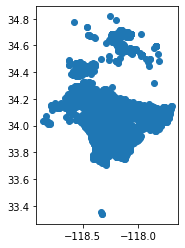

In [33]:
gdf.plot()

In [13]:
db_connection = sql.connect(host='Samuels-MacBook-Air.local', database='realestate_AVM',
                            user='root', password='Building9Floor')

In [14]:
df = pd.read_sql('SELECT * FROM properties;', con=db_connection)
df.head()

,latitude,longitude,address,property_type,home_size,lot_size,year_built,parcel_number,realtyID,county,...,sale_price,estimated_value,sex_offenders,crime_index,enviornmental_hazards,natural_disasters,school quality,url,bedrooms,bathrooms
0,33.974622,-118.133679,6224 Nye St,Condominium,1357.0,22215.6,1988.0,6357012043,1.111054e+09,Los Angeles,...,469000.0,439000.0,7,High,15,1,Average,https://www.realtytrac.com/property/ca/commerc...,3.0,3.0
1,34.156562,-118.396891,4723 Laurel Canyon Blvd,Restaurant,2250.0,9799.0,1959.0,2356037034,1.111055e+09,Los Angeles,...,1910000.0,,5,,6,1,Excellent,https://www.realtytrac.com/property/ca/valley-...,,
2,34.677777,-118.451165,18118 Elizabeth Lake Rd,Apartment house (5+ units),1454.0,13635.0,1948.0,3242015023,1.111056e+09,Los Angeles,...,325000.0,,0,,2,1,,https://www.realtytrac.com/property/ca/lake-hu...,7.0,6.0
3,34.072960,-118.066898,9259 Ramona Blvd,Single Family Residence,1682.0,7000.0,1978.0,8594027016,1.111056e+09,Los Angeles,...,738000.0,752000.0,3,Moderate,11,1,Excellent,https://www.realtytrac.com/property/ca/rosemea...,3.0,2.0
4,33.777716,-118.154913,825 Obispo Ave,"Triplex (3 units, any combination)",1958.0,6754.0,1938.0,7258013016,1.111056e+09,Los Angeles,...,1185000.0,989000.0,11,Slightly High,8,1,Average,https://www.realtytrac.com/property/ca/long-be...,4.0,3.0
